## H·ªçc ph·∫ßn: Th·ªã gi√°c m√°y t√≠nh
#### Nh√≥m 9:
- Ph·∫°m Ph∆∞·ªõc B·∫£o T√≠n - 22E1020021
- L√™ Qu√Ω Minh Quang - 22E1020007
- Tr·ªãnh Qu·ªëc D√¢n - 22E1020014 

## M√¥ t·∫£ d·ªØ li·ªáu
- B·ªô d·ªØ li·ªáu v·ªÅ ph√¢n lo·∫°i "Shoe", "Sandal", "Boot". Ngu·ªìn d·ªØ li·ªáu : Kaggle ([Shoe vs Sandal vs Boot Image Dataset](https://www.kaggle.com/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images?fbclid=IwZXh0bgNhZW0CMTEAAR4Qhm5prfJKpfYH3kwbWi-Tcsk1Q1AHnBqh4scpOWhT4CTERDLwisuTuvNcDg_aem_8fGVUmMtZuHu_Cmj3jxaCg)).
- Ba l·ªõp 3 th∆∞ m·ª•c ri√™ng, m·ªói th∆∞ m·ª•c 5000 ·∫£nh.


## Chu·∫©n b·ªã d·ªØ li·ªáu

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import pandas as pd
# ======================
# 1. Chu·∫©n b·ªã d·ªØ li·ªáu
# ======================
data_dir = r"D:\datasets\ShoeSandalBoot"
classes = ["Shoe", "Sandal", "Boot"]
  # resize ·∫£nh k√≠ch th∆∞·ªõc 120x120

X = []
y = []

img_size = (120, 120)

for label, c in enumerate(classes):
    folder = os.path.join(data_dir, c)
    for img_file in os.listdir(folder)[:15000]:  
        img = load_img(os.path.join(folder, img_file), target_size=img_size, color_mode="grayscale")
        arr = img_to_array(img).flatten() / 255.0  # 120*120 = 14400 features
        X.append(arr)
        y.append(c)

X = np.array(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

df = pd.DataFrame(X_2d, columns=["Feature 1", "Feature 2"])
df["Target"] = y

sample_idx = np.random.choice(len(df), size=500, replace=False)
df_sample = df.iloc[sample_idx]

# V·∫Ω PCA 2D ch·ªâ v·ªõi 500 ƒëi·ªÉm
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_sample,
    x="Feature 1", y="Feature 2",
    hue="Target", palette="tab10", legend="full", s=70
)
plt.title("Shoes vs Sandal vs Boot (PCA 2D Projection - 500 samples)")
plt.grid(True)
plt.show()

In [2]:
#PCA 3 chi·ªÅu
pca = PCA(n_components=3)
X_3d = pca.fit_transform(X_scaled)

df = pd.DataFrame(X_3d, columns=["Feature 1", "Feature 2", "Feature 3"])
df["Target"] = y

# L·∫•y ng·∫´u nhi√™n 500 ƒëi·ªÉm ƒë·ªÉ v·∫Ω
sample_idx = np.random.choice(len(df), size=400, replace=False)
df_sample = df.iloc[sample_idx]

# V·∫Ω scatter 3D
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
markers = ['o', '^', 's', 'D', 'P', 'X', '*']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, target in enumerate(df_sample["Target"].unique()):
    subset = df_sample[df_sample["Target"] == target]
    ax.scatter(
        subset["Feature 1"],
        subset["Feature 2"],
        subset["Feature 3"],
        c=colors[i % len(colors)],
        marker=markers[i % len(markers)],
        label=target,
        alpha=0.8,
        s=60,
        edgecolors='k'
    )

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.set_title("Shoes vs Sandal vs Boot (PCA 3D Projection - 500 samples)")
ax.legend()
plt.show()

## Chia t·∫≠p d·ªØ li·ªáu

In [4]:

# ======================
# 2. Chia d·ªØ li·ªáu
# ======================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=40, stratify=y
)
print("Train:", len(X_train), "| Test:", len(X_test))

Train: 12000 | Test: 3000


So S√°nh accuracy theo k, s·ªë l·∫ª

In [5]:
# 3. So s√°nh accuracy theo k
# ======================
k_values = range(1, 12, 2)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k={k}, Accuracy={acc:.4f}")

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker="o", linestyle="-", color="b")
plt.xticks(k_values)
plt.xlabel("Number of K (k)")
plt.ylabel("Accuracy")
plt.title("Compare accuracy with k - KNN Shoe/Sandal/Boot")
plt.grid(True)
plt.show()


k=1, Accuracy=0.8923
k=3, Accuracy=0.8830
k=5, Accuracy=0.8813
k=7, Accuracy=0.8790
k=9, Accuracy=0.8743
k=11, Accuracy=0.8700


Ch·ªçn k (t·ª´ k·∫øt qu·∫£ th·ª≠ nghi·ªám tr√™n)

In [6]:
# ======================
# 3. Hu·∫•n luy·ªán KNN
# ======================
k=5
knn_k = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
knn_k.fit(X_train, y_train)

# ======================
# 4. ƒê√°nh gi√° m√¥ h√¨nh
# ======================
y_pred = knn_k.predict(X_test)

# ƒê·ªô ch√≠nh x√°c tr√™n t·∫≠p train
y_train_pred = knn_k.predict(X_train)

print("üîπ Train Accuracy:", accuracy_score(y_train, y_train_pred))

print("üîπ Test Accuracy:", accuracy_score(y_test, y_pred))

print("\nüîπ Classification Report Test:\n", classification_report(y_test, y_pred, target_names=classes))



üîπ Train Accuracy: 0.9118333333333334
üîπ Test Accuracy: 0.8813333333333333

üîπ Classification Report Test:
               precision    recall  f1-score   support

        Shoe       0.84      0.98      0.90      1000
      Sandal       0.94      0.75      0.83      1000
        Boot       0.88      0.91      0.90      1000

    accuracy                           0.88      3000
   macro avg       0.89      0.88      0.88      3000
weighted avg       0.89      0.88      0.88      3000



V·∫Ω ma tr·∫≠n nh·∫ßm l·∫´n tr√™n t·∫≠p test v·ªõi K ƒë√£ ch·ªçn

In [7]:
# 5. Ma tr·∫≠n nh·∫ßm l·∫´n
# ======================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - Shoe vs Sandal vs Boot k={k}")
plt.show()


## Ph√¢n lo·∫°i ·∫£nh th·ª±c t·∫ø

In [ ]:
# ======================
# 6. H√†m d·ª± ƒëo√°n ·∫£nh trong folder
# ======================
def predict_folder(folder_path, limit=None):
    results = []
    count = 0
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img_original=cv2.imread(img_path)  # ƒë·ªçc ·∫£nh m√†u
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # ƒë·ªçc ·∫£nh Gray
        if img is None:
            continue

        img_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB) 

        img = cv2.resize(img, img_size)                   # (120,120)
        img_flat = img.flatten().reshape(1, -1) / 255.0
        img_scaled = scaler.transform(img_flat)
        prediction = knn_k.predict(img_scaled)[0]

        # X√°c su·∫•t theo phi·∫øu b·∫ßu
        proba = knn_k.predict_proba(img_scaled)[0]
        class_names = knn_k.classes_
        proba_text = ", ".join([f"{cls}:{p:.2f}" for cls, p in zip(class_names, proba)])

        results.append((filename, prediction, proba_text))

        

        plt.imshow(img_rgb, cmap="gray")
        plt.title(f"{filename}\nD·ª± ƒëo√°n: {prediction}\n  {proba_text}")
        plt.axis("off")
        plt.show()

        print(f"{filename} ‚Üí {prediction}")

        count += 1
        if limit and count >= limit:
            break
    
    return results
test_dir = r"D:\datasets\test"
results = predict_folder(test_dir, limit=50) 


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:\\test'

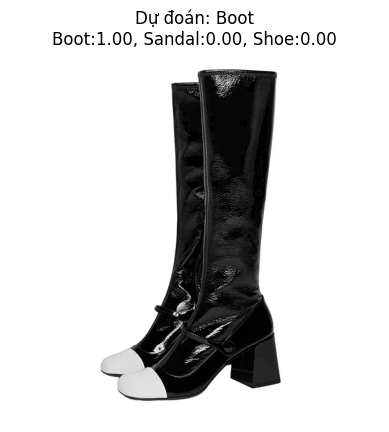

D:\datasets\t1.png ‚Üí Boot (Boot:1.00, Sandal:0.00, Shoe:0.00)


np.str_('Boot')

In [ ]:
from fileinput import filename
def predict_image(img_path):
    img_original = cv2.imread(img_path)  # ·∫£nh m√†u
    img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    if img_original is None or img_gray is None:
        print(f"Kh√¥ng ƒë·ªçc ƒë∆∞·ª£c ·∫£nh: {img_path}")
        return None
    
    # Resize + flatten
    img_resized = cv2.resize(img_gray, img_size)   # (120,120)
    img_flat = img_resized.flatten().reshape(1, -1) / 255.0

    # Scale (gi·ªëng train)
    img_scaled = scaler.transform(img_flat)

    # D·ª± ƒëo√°n
    prediction = knn_k.predict(img_scaled)[0]
    proba = knn_k.predict_proba(img_scaled)[0]  # x√°c su·∫•t
    class_names = knn_k.classes_
    proba_text = ", ".join([f"{cls}:{p:.2f}" for cls, p in zip(class_names, proba)])

    # Hi·ªÉn th·ªã ·∫£nh g·ªëc
    img_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
    plt.imshow(img_gray, cmap="gray")
    plt.title(f"D·ª± ƒëo√°n: {prediction}\n{proba_text}")
    plt.axis("off")
    plt.show()

    print(f"{img_path} ‚Üí {prediction} ({proba_text})")
    return prediction

predict_image(r"D:\datasets\t1.png")
